# Fraud Transaction Detection 
### - Dhinsha

##### Objective : To develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan.

### Import necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
# Read the data
df=pd.read_csv("C:/Users/adhua/Downloads/Fraud.csv")
# Shape of the data
df.shape

(6362620, 11)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Data cleaning

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Dataset contains no null values 

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Exploring the statstical fearures of the dataset.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [8]:
target = 'isFraud'
features = [feature for feature in df.columns if feature not in [target]]

In [9]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. 
Hence DECISION TREE and RANDOM FOREST are good methods for imbalanced data.

# Data Visualization

### Number of legit and fraud transactions 

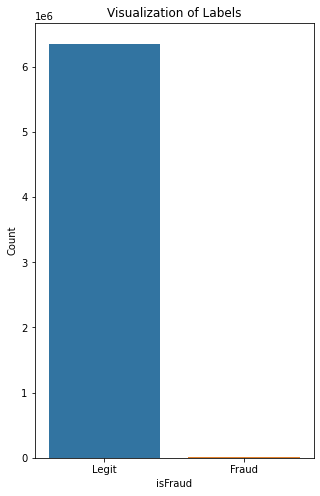

In [10]:
# First we can do a count plot 
plt.figure(figsize=(5,8))
labels = ["Legit", "Fraud"]
sns.countplot(df['isFraud'])
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [11]:
df.groupby([target, 'type']).size().unstack(fill_value=0)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


<AxesSubplot:xlabel='amount'>

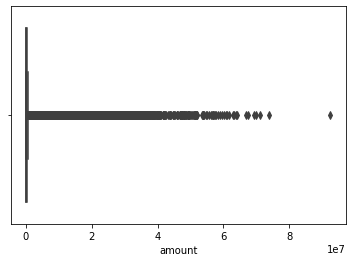

In [12]:
sns.boxplot(df['amount'])

<AxesSubplot:xlabel='type', ylabel='count'>

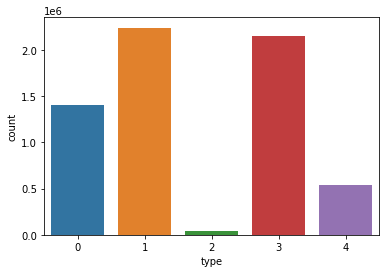

In [17]:
sns.countplot(df['type'])

### Correlation Heatmap

<AxesSubplot:>

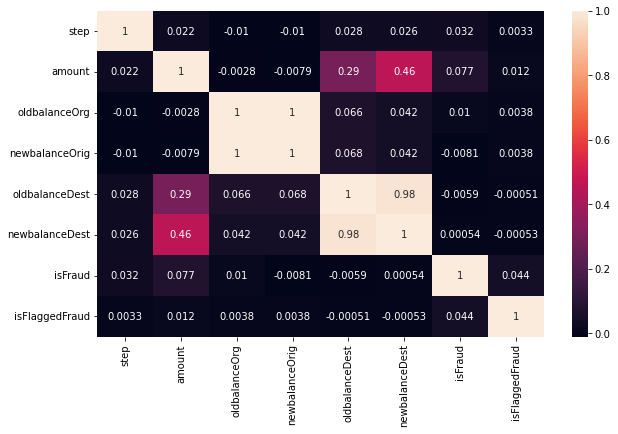

In [14]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

### Label Encoding

In [15]:
# Checking how many attributes are dtype: object

objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [16]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


# Problem Solving

In [18]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


### Multicolinearity 

In [19]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [20]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


# Model Building

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [22]:
# copying the original dataset into X
X=df
# droping building_id and dependent variable damage_grade
# independant variables
X=X.drop(["isFraud"],axis=1)
# dependent variable
y=df["isFraud"]

In [23]:
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [24]:
print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)

Shape of X_train:  (5090096, 10)
Shape of X_test:  (1272524, 10)


# Decision tree

In [25]:
dt = DecisionTreeClassifier(random_state=0)

In [26]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
prediction = dt.predict(x_test)

In [28]:
cm = confusion_matrix(y_test, prediction)
cm

array([[1270731,     173],
       [    218,    1402]], dtype=int64)

In [29]:
accuracy_score(y_test, prediction)

0.9996927366399376

In [30]:
f1_score(y_test,prediction, average="micro")

0.9996927366399376

In [31]:
print("classification report for decision tree :\n\n",classification_report(y_test, prediction))

classification report for decision tree :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.89      0.87      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.93      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



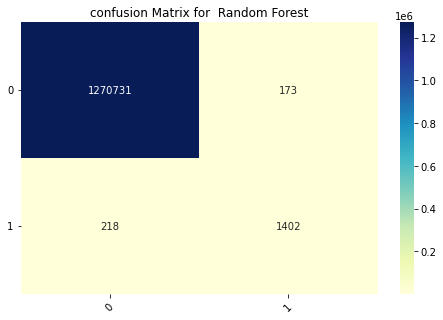

In [32]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

# Random Forest

In [44]:
# RANDOM FOREST

clf = RandomForestClassifier(n_estimators= 100)

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
prediction = clf.predict(x_test)

In [47]:
cm = confusion_matrix(y_test, prediction)
cm

array([[1270731,     173],
       [    218,    1402]], dtype=int64)

In [48]:
accuracy_score(y_test, prediction)

0.9996927366399376

In [49]:
f1_score(y_test,prediction, average="micro")

0.9996927366399376

In [50]:
print("classification report for Random Forest :\n\n",classification_report(y_test, prediction))

classification report for Random Forest :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.89      0.87      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.93      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



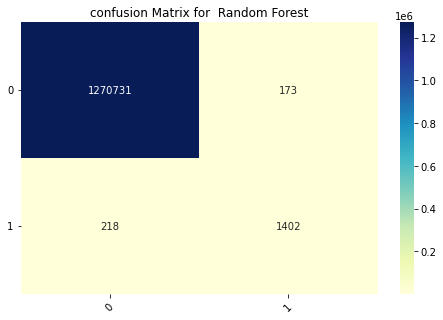

In [52]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

# Xgboost

In [34]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 89.1/89.1 MB 3.8 MB/s eta 0:00:00


In [35]:
import xgboost as xgb

In [39]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
pred1 = model.predict(x_train)
pred2 = model.predict(x_test)

print(f1_score(y_train, pred1))
print(f1_score(y_test, pred2))

print(classification_report(y_train, pred1))
print(classification_report(y_test, pred2))

0.9530720088335043
0.9187601957585644
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       0.99      0.92      0.95      6593

    accuracy                           1.00   5090096
   macro avg       1.00      0.96      0.98   5090096
weighted avg       1.00      1.00      1.00   5090096

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.87      0.92      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.93      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524



# Conclusion

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.


Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.


Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

##### What are the key factors that predict fraudulent customer?

The source of request is secured or not ?

Is the name of organisation asking for money is legit or not ?

Transaction history of vendors.

##### What kind of prevention should be adopted while company update its infrastructure?

Use smart vertified apps only.

Browse through secured websites.

Use secured internet connections (USE VPN).

Keep your mobile and laptop security updated.

Don't respond to unsolicited calls/SMS(s/E-mails.

If you feel like you have been tricked or security compromised, contact your bank immidiately.

##### Assuming these actions have been implemented, how would you determine if they work?

Bank sending E-statements.

Customers keeping a check of their account activity.

Always keep a log of your payments.